<a href="https://colab.research.google.com/github/vivianusdjpy/WEEK-4-INDEPENDENT-PROJECT-HYPOTHESIS-TESTING/blob/master/WEEK_4_INDEPENDENT_PROJECT_HYPOTHESIS_TESTING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LOADING THE DATA & LIBRARIES

In [0]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as pyplot

import seaborn as sns

import pandas_profiling

from sklearn.cluster import KMeans

from numpy.random import seed

from numpy.random import randn

from statsmodels.graphics.gofplots import qqplot

%matplotlib inline

In [3]:
#loading the data
df= pd.read_csv("/content/autolib_daily_events_postal_code.csv")
df


,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16080,95880,6/15/2018,1440,4,weekday,15,10,0,0,2,3,0,0
16081,95880,6/16/2018,1440,5,weekend,19,19,0,0,2,1,0,0
16082,95880,6/17/2018,1440,6,weekend,33,35,1,1,0,0,0,0
16083,95880,6/18/2018,1440,0,weekday,11,14,3,5,2,2,0,0


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16085 entries, 0 to 16084
Data columns (total 13 columns):
Postal code               16085 non-null int64
date                      16085 non-null object
n_daily_data_points       16085 non-null int64
dayOfWeek                 16085 non-null int64
day_type                  16085 non-null object
BlueCars_taken_sum        16085 non-null int64
BlueCars_returned_sum     16085 non-null int64
Utilib_taken_sum          16085 non-null int64
Utilib_returned_sum       16085 non-null int64
Utilib_14_taken_sum       16085 non-null int64
Utilib_14_returned_sum    16085 non-null int64
Slots_freed_sum           16085 non-null int64
Slots_taken_sum           16085 non-null int64
dtypes: int64(11), object(2)
memory usage: 1.6+ MB


In [55]:
#getting the correlation matrix of the dataframe
#the correlation of an element to itself is 1 thus the larger the value is as it approaches one means that the correlation is higher
#between the two variables/elements.
df.corr()

,Postal code,n_daily_data_points,dayOfWeek,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
Postal code,1.000000,0.000432,0.000343,-0.698020,-0.697519,-0.625521,-0.624786,-0.656744,-0.656516,-0.749528,-0.749157
n_daily_data_points,0.000432,1.000000,0.002039,0.029411,0.030063,0.022669,0.023322,0.025738,0.026351,0.020873,0.021169
dayOfWeek,0.000343,0.002039,1.000000,0.079649,0.081954,0.069295,0.071713,0.068790,0.071279,0.049960,0.050468
BlueCars_taken_sum,-0.698020,0.029411,0.079649,1.000000,0.998660,0.893833,0.892850,0.940946,0.940757,0.948575,0.947996
BlueCars_returned_sum,-0.697519,0.030063,0.081954,0.998660,1.000000,0.893613,0.893268,0.940542,0.941117,0.948258,0.948771
Utilib_taken_sum,-0.625521,0.022669,0.069295,0.893833,0.893613,1.000000,0.981982,0.847519,0.846304,0.853760,0.853049
Utilib_returned_sum,-0.624786,0.023322,0.071713,0.892850,0.893268,0.981982,1.000000,0.845645,0.845306,0.852939,0.852936
Utilib_14_taken_sum,-0.656744,0.025738,0.068790,0.940946,0.940542,0.847519,0.845645,1.000000,0.992062,0.899232,0.898719
Utilib_14_returned_sum,-0.656516,0.026351,0.071279,0.940757,0.941117,0.846304,0.845306,0.992062,1.000000,0.899442,0.899777
Slots_freed_sum,-0.749528,0.020873,0.049960,0.948575,0.948258,0.853760,0.852939,0.899232,0.899442,1.000000,0.999221


# UNIVARIATE ANALYSIS

# Postal Code 
postal code of the area (in Paris)

In [21]:
#column 1
df['Postal code'].unique()
#df.groupby(df['Postal code']).sum()
#df['Postal code'].value_counts()
#there are 104 unique postal codes 

array([75001, 75002, 75003, 75004, 75005, 75006, 75007, 75008, 75009,
       75010, 75011, 75012, 75013, 75014, 75015, 75016, 75017, 75018,
       75019, 75020, 75112, 75116, 78000, 78140, 78150, 91330, 91370,
       91400, 92000, 92100, 92110, 92120, 92130, 92140, 92150, 92160,
       92170, 92190, 92200, 92210, 92220, 92230, 92240, 92250, 92260,
       92270, 92290, 92300, 92310, 92320, 92330, 92340, 92350, 92360,
       92370, 92380, 92390, 92400, 92410, 92420, 92500, 92600, 92700,
       92800, 93100, 93110, 93130, 93150, 93170, 93200, 93230, 93260,
       93300, 93310, 93350, 93360, 93370, 93390, 93400, 93440, 93500,
       93600, 93700, 93800, 94000, 94100, 94110, 94120, 94130, 94140,
       94150, 94160, 94220, 94230, 94300, 94340, 94410, 94450, 94500,
       94700, 94800, 95100, 95870, 95880])

In [32]:
df['Postal code'].isnull().sum()
#there are no null values in the postal code column

0

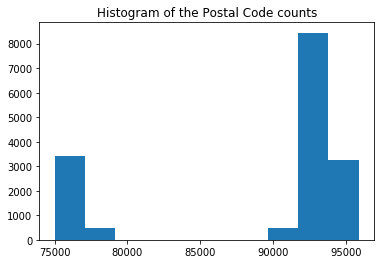

In [37]:
#Histogram of the Postal Code column
pyplot.hist(df['Postal code'])
pyplot.title('Histogram of the Postal Code counts')
pyplot.show()

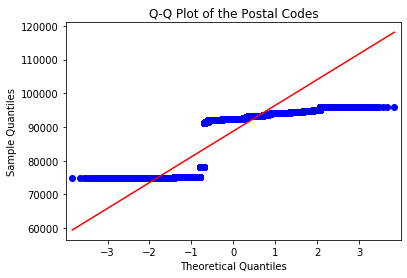

In [36]:
#Q-Q plot to show the distribution of the entries based on the postal codes.
qqplot(df['Postal code'], line='s')
pyplot.title('Q-Q Plot of the Postal Codes')
pyplot.show()

# Date
date of the row aggregation

In [39]:

df['date'].describe()
#the datatype for the date is wrong and should be changed to date_time
#there are 156 unique dates meaning that the data was taken over a period of 156 days
#2nd January 2018 has the highest records

count        16085
unique         156
top       2/1/2018
freq           104
Name: date, dtype: object

In [49]:
#changing to date_time
from datetime import datetime
#first convert the date time into string 
df['date'] =  pd.to_datetime(df['date'])
df['date'].describe()
#the data records are from first January 2018 to 19th June 2018

count                   16085
unique                    156
top       2018-06-12 00:00:00
freq                      104
first     2018-01-01 00:00:00
last      2018-06-19 00:00:00
Name: date, dtype: object

# n_daily_data_points
number of daily data points that were available for aggregation, that day

In [59]:

df['n_daily_data_points'].unique()

array([1440, 1438, 1439, 1320, 1437, 1434, 1398, 1420, 1425, 1396, 1429,
       1389, 1380, 1364, 1318, 1377, 1203, 1417, 1435, 1174, 1436, 1411,
       1370])

In [51]:
df['n_daily_data_points'].describe()
#count    16085.000000
#mean      1431.330619
#std         33.212050
#min       1174.000000
#25%       1439.000000
#50%       1440.000000
#75%       1440.000000
#max       1440.000000

count    16085.000000
mean      1431.330619
std         33.212050
min       1174.000000
25%       1439.000000
50%       1440.000000
75%       1440.000000
max       1440.000000
Name: n_daily_data_points, dtype: float64

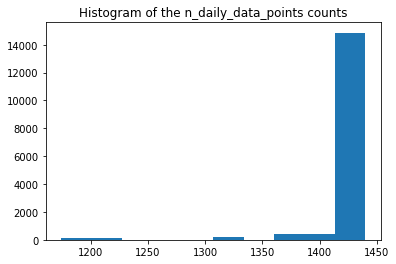

In [52]:
#Histogram of the n_daily_data_points column
pyplot.hist(df['n_daily_data_points'])
pyplot.title('Histogram of the n_daily_data_points counts')
pyplot.show()
#the data is skewed 

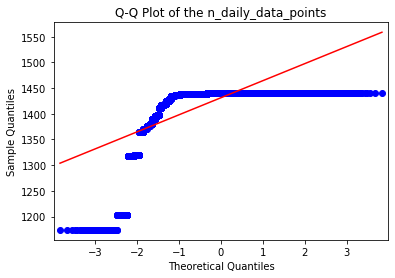

In [54]:
#Q-Q plot to show the distribution of the entries based on the n_daily_data_points.
qqplot(df['n_daily_data_points'], line='s')
pyplot.title('Q-Q Plot of the n_daily_data_points')
pyplot.show()
#The data does not follow a normal distribution

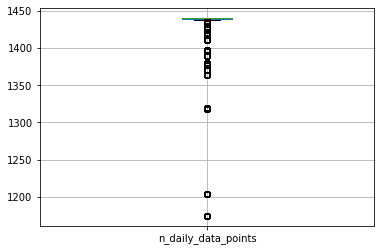

In [70]:
df.boxplot(column=['n_daily_data_points'])

In [57]:
df['n_daily_data_points'].skew()
#the data is skewed to the left
#has a longer tail to the left of the distribution

-5.742776211517434

# Day Of Week
identifier of weekday (0: Monday -> 6: Sunday)

In [61]:
df['dayOfWeek'].unique()
#7 days of the week

array([0, 1, 2, 3, 4, 5, 6])

In [63]:
df['dayOfWeek'].describe()
#75% of the data was recorded on saturday

count    16085.000000
mean         2.969599
std          2.008378
min          0.000000
25%          1.000000
50%          3.000000
75%          5.000000
max          6.000000
Name: dayOfWeek, dtype: float64

In [66]:
df.groupby(df['dayOfWeek']).count()
#the data distribution has a small variation with the values ranging from 2267 to 2374

,Postal code,date,n_daily_data_points,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
dayOfWeek,,,,,,,,,,,,
0,2374,2374,2374,2374,2374,2374,2374,2374,2374,2374,2374,2374
1,2363,2363,2363,2363,2363,2363,2363,2363,2363,2363,2363,2363
2,2268,2268,2268,2268,2268,2268,2268,2268,2268,2268,2268,2268
3,2268,2268,2268,2268,2268,2268,2268,2268,2268,2268,2268,2268
4,2271,2271,2271,2271,2271,2271,2271,2271,2271,2271,2271,2271
5,2267,2267,2267,2267,2267,2267,2267,2267,2267,2267,2267,2267
6,2274,2274,2274,2274,2274,2274,2274,2274,2274,2274,2274,2274


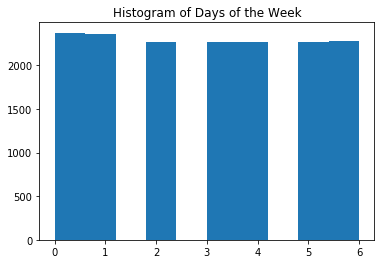

In [64]:
#Histogram to show the distribution throughout the week column
pyplot.hist(df['dayOfWeek'])
pyplot.title('Histogram of Days of the Week')
pyplot.show()
#no much variation in the distribution

# Day Type
Weekday or Weekend

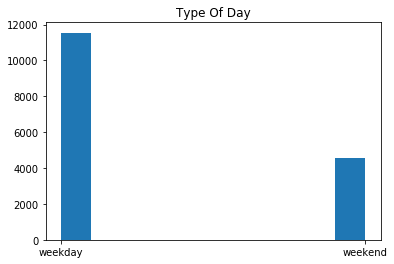

In [73]:
pyplot.hist(df['day_type'])
pyplot.title('Type Of Day')
pyplot.show()


# Blue Cars 

# Utilib

# Utilib 14

# BI-VARIATE ANALYSIS

# MULTI-VARIATE ANALYSIS

# SAMPLING

# EXPLORATORY DATA ANALYSIS

# HYPOTHESIS